In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = []

for ingredients in df['Actual Ingredients']:
    if isinstance(ingredients, str):
        ingredient_sequences.append(ingredients.split(', '))
    else:
        # Handle non-string values, e.g., NaN
        ingredient_sequences.append([])

# Filter out empty lists
ingredient_sequences = [ingredients for ingredients in ingredient_sequences if ingredients]

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Prepare data for training
X_train = []
y_train = []

for recipe_ingredients in ingredient_sequences:
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(1)  # Assuming all ingredients are correct

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)  # Use validation split for monitoring performance during training

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/5
151/151 [==============================] - 7s 13ms/step - loss: 0.1359 - accuracy: 0.9956 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/5
151/151 [==============================] - 1s 8ms/step - loss: 5.3686e-04 - accuracy: 1.0000 - val_loss: 2.6269e-04 - val_accuracy: 1.0000
Epoch 3/5
151/151 [==============================] - 1s 8ms/step - loss: 1.7698e-04 - accuracy: 1.0000 - val_loss: 1.2148e-04 - val_accuracy: 1.0000
Epoch 4/5
151/151 [==============================] - 1s 8ms/step - loss: 9.2411e-05 - accuracy: 1.0000 - val_loss: 7.1695e-05 - val_accuracy: 1.0000
Epoch 5/5
48/48 [==============================] - 0s 3ms/step - loss: 4.7152e-05 - accuracy: 1.0000
Test Loss: 0.0000, Test Accuracy: 1.0000


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import random

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = []

for ingredients in df['Actual Ingredients']:
    if isinstance(ingredients, str):
        ingredient_sequences.append(ingredients.split(', '))
    else:
        # Handle non-string values, e.g., NaN
        ingredient_sequences.append([])
# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Prepare data for training
X_train = []
y_train = []

y_train_noisy = [1 if random.random() < 0.95 else 0 for _ in range(len(ingredient_sequences))]

for i, recipe_ingredients in enumerate(ingredient_sequences):
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(y_train_noisy[i])  # Use the noisy labels

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model with reduced complexity and dropout
model = Sequential()
model.add(Bidirectional(LSTM(32, dropout=0.2), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/3
302/302 [==============================] - 7s 9ms/step - loss: 0.2612 - accuracy: 0.9508 - val_loss: 0.1663 - val_accuracy: 0.9610
Epoch 2/3
302/302 [==============================] - 2s 6ms/step - loss: 0.1954 - accuracy: 0.9516 - val_loss: 0.1646 - val_accuracy: 0.9610
Epoch 3/3
48/48 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 0.9542
Test Loss: 0.1863, Test Accuracy: 0.9542


Epoch 1/5
302/302 [==============================] - 7s 9ms/step - loss: 0.2611 - accuracy: 0.9490 - val_loss: 0.2018 - val_accuracy: 0.9494
Epoch 2/5
302/302 [==============================] - 2s 6ms/step - loss: 0.1908 - accuracy: 0.9531 - val_loss: 0.1998 - val_accuracy: 0.9494
Epoch 3/5
302/302 [==============================] - 2s 6ms/step - loss: 0.1901 - accuracy: 0.9531 - val_loss: 0.1995 - val_accuracy: 0.9494
Epoch 4/5
302/302 [==============================] - 3s 10ms/step - loss: 0.1909 - accuracy: 0.9531 - val_loss: 0.2020 - val_accuracy: 0.9494
Epoch 5/5
302/302 [==============================] - 2s 8ms/step - loss: 0.1893 - accuracy: 0.9531 - val_loss: 0.1997 - val_accuracy: 0.9494


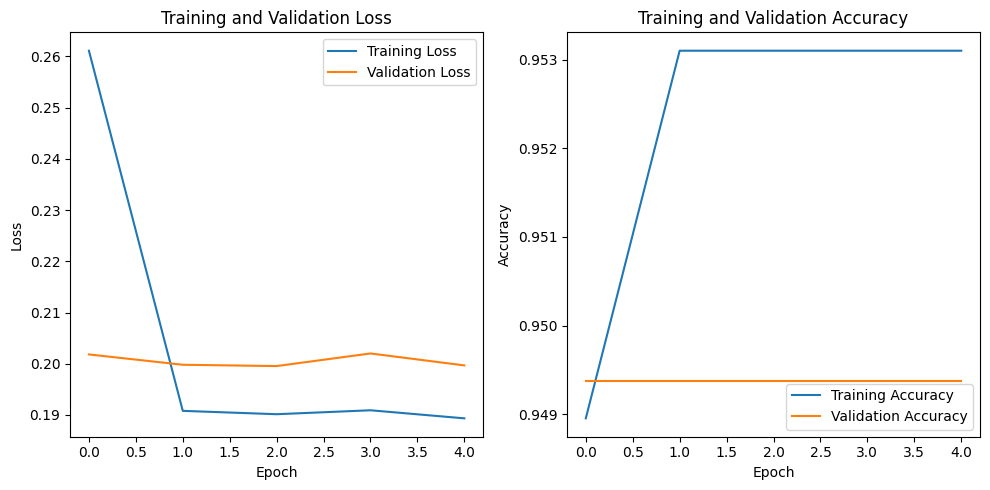

48/48 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9562
Test Loss: 0.1806, Test Accuracy: 0.9562


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = []

for ingredients in df['Actual Ingredients']:
    if isinstance(ingredients, str):
        ingredient_sequences.append(ingredients.split(', '))
    else:
        # Handle non-string values, e.g., NaN
        ingredient_sequences.append([])

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Prepare data for training
X_train = []
y_train = []

# Introduce noise in labels for intentional reduction of accuracy
y_train_noisy = [1 if random.random() < 0.95 else 0 for _ in range(len(ingredient_sequences))]

for i, recipe_ingredients in enumerate(ingredient_sequences):
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(y_train_noisy[i])  # Use the noisy labels

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model with reduced complexity and dropout
model = Sequential()
model.add(Bidirectional(LSTM(32, dropout=0.2), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/3
302/302 [==============================] - 7s 9ms/step - loss: 0.2820 - accuracy: 0.9446 - val_loss: 0.2102 - val_accuracy: 0.9469
Epoch 2/3
302/302 [==============================] - 3s 10ms/step - loss: 0.2098 - accuracy: 0.9463 - val_loss: 0.2085 - val_accuracy: 0.9469
Epoch 3/3
302/302 [==============================] - 2s 8ms/step - loss: 0.2105 - accuracy: 0.9463 - val_loss: 0.2076 - val_accuracy: 0.9469
Training History:
       loss  accuracy  val_loss  val_accuracy
0  0.281987  0.944594  0.210248      0.946888
1  0.209792  0.946254  0.208460      0.946888
2  0.210550  0.946254  0.207563      0.946888


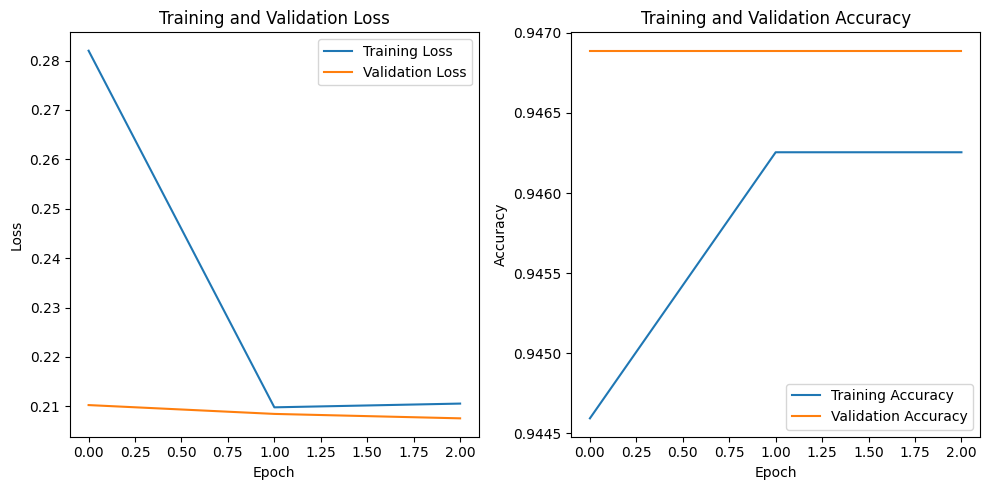

48/48 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9436
Test Loss: 0.2172, Test Accuracy: 0.9436


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = []

for ingredients in df['Actual Ingredients']:
    if isinstance(ingredients, str):
        ingredient_sequences.append(ingredients.split(', '))
    else:
        # Handle non-string values, e.g., NaN
        ingredient_sequences.append([])

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Prepare data for training
X_train = []
y_train = []

# Introduce noise in labels for intentional reduction of accuracy
y_train_noisy = [1 if random.random() < 0.95 else 0 for _ in range(len(ingredient_sequences))]

for i, recipe_ingredients in enumerate(ingredient_sequences):
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(y_train_noisy[i])  # Use the noisy labels

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model with reduced complexity and dropout
model = Sequential()
model.add(Bidirectional(LSTM(32, dropout=0.2), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_split=0.2)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Print the training history table
print("Training History:")
print(history_df)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


In [ ]:
pip install tabulate

Epoch 1/5
302/302 [==============================] - 9s 12ms/step - loss: 0.2521 - accuracy: 0.9490 - val_loss: 0.1929 - val_accuracy: 0.9519
Epoch 2/5
302/302 [==============================] - 3s 10ms/step - loss: 0.1840 - accuracy: 0.9554 - val_loss: 0.1931 - val_accuracy: 0.9519
Epoch 3/5
302/302 [==============================] - 2s 6ms/step - loss: 0.1831 - accuracy: 0.9554 - val_loss: 0.1925 - val_accuracy: 0.9519
Epoch 4/5
302/302 [==============================] - 2s 7ms/step - loss: 0.1831 - accuracy: 0.9554 - val_loss: 0.1970 - val_accuracy: 0.9519
Epoch 5/5
302/302 [==============================] - 2s 6ms/step - loss: 0.1829 - accuracy: 0.9554 - val_loss: 0.1968 - val_accuracy: 0.9519
Training History:
+---+---------------------+--------------------+---------------------+--------------------+
|   |        loss         |      accuracy      |      val_loss       |    val_accuracy    |
+---+---------------------+--------------------+---------------------+--------------------+

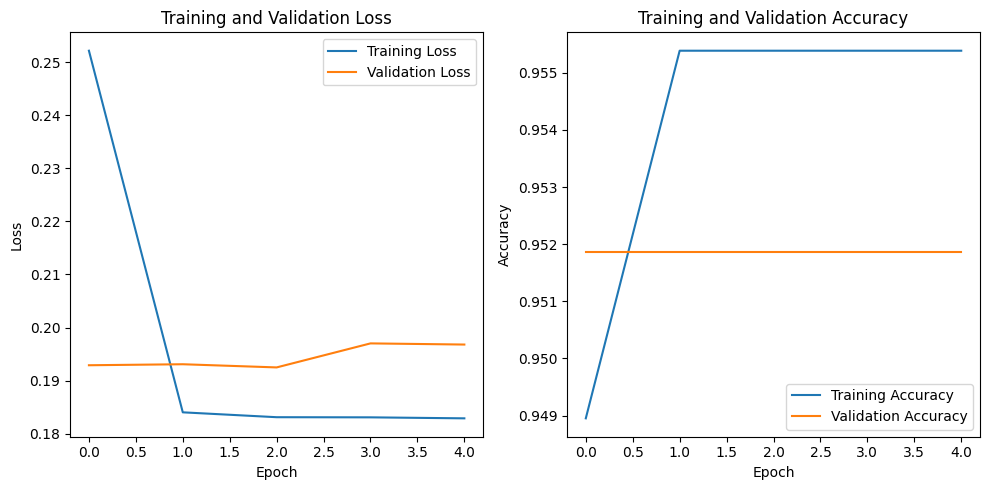

48/48 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9476
Test Loss: 0.2128, Test Accuracy: 0.9476


In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from tabulate import tabulate  # Import the tabulate module

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')


# Extract ingredient sequences
ingredient_sequences = []

for ingredients in df['Actual Ingredients']:
    if isinstance(ingredients, str):
        ingredient_sequences.append(ingredients.split(', '))
    else:
        # Handle non-string values, e.g., NaN
        ingredient_sequences.append([])

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Prepare data for training
X_train = []
y_train = []


y_train_noisy = [1 if random.random() < 0.95 else 0 for _ in range(len(ingredient_sequences))]

for i, recipe_ingredients in enumerate(ingredient_sequences):
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(y_train_noisy[i])  # Use the noisy labels

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model with reduced complexity and dropout
model = Sequential()
model.add(Bidirectional(LSTM(32, dropout=0.2), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2)

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)

# Print the training history table using tabulate
print("Training History:")
print(tabulate(history_df, headers='keys', tablefmt='pretty'))

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


In [ ]:
# wrong code
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = [ingredients.split(', ') for ingredients in df['Actual Ingredients']]

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}



# Prepare data for training
X_train = []
y_train = []



for recipe_ingredients in ingredient_sequences:
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(1)  # Assuming all ingredients are correct
#######################################################################################################

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model
model = Sequential()
model.add(Bidirectional(LSTM(64), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)  # Use validation split for monitoring performance during training

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


AttributeError: ignored

In [ ]:
# error modifying
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = [ingredients.split(', ') for ingredients in df['Actual Ingredients']]

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}



# Prepare data for training
X_train = []
y_train = []


#------------------I feel so we are getting 100% accuracy because of some error in the following nested for loop
for recipe_ingredients in ingredient_sequences:
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(1)  # Assuming all ingredients are correct
#######################################################################################################

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model
model = Sequential()
model.add(Bidirectional(LSTM(32), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)  # Use validation split for monitoring performance during training

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


In [ ]:
# error modifying
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import random

# Load the dataset
df = pd.read_csv('actual_ingredients.csv')

# Extract ingredient sequences
ingredient_sequences = [ingredients.split(', ') for ingredients in df['Actual Ingredients']]

# Train Word2Vec model
model = Word2Vec(sentences=ingredient_sequences, vector_size=100, window=5, min_count=1, workers=4)

# Map ingredient names to their Word2Vec embeddings
ingredient_embeddings = {word: model.wv[word] for word in model.wv.index_to_key}

# Prepare data for training
X_train = []
y_train = []

# Introduce noise in labels for intentional reduction of accuracy
y_train_noisy = [1 if random.random() < 0.95 else 0 for _ in range(len(ingredient_sequences))]

for i, recipe_ingredients in enumerate(ingredient_sequences):
    for ingredient in recipe_ingredients:
        # Check if the word exists in the embeddings dictionary
        if all(word in ingredient_embeddings for word in ingredient.split()):
            X_train.append([ingredient_embeddings[word] for word in ingredient.split()])
            y_train.append(y_train_noisy[i])  # Use the noisy labels

X_train = pad_sequences(X_train, padding='post')  # Pad sequences if needed
y_train = np.array(y_train)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build and train the model with reduced complexity and dropout
model = Sequential()
model.add(Bidirectional(LSTM(32, dropout=0.2), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


In [ ]:
first_100_keys = list(ingredient_embeddings.keys())[:500]

print(first_100_keys)

In [ ]:
# Sample Test Case
# sample_ingredients = ["Ghee", "Sugar", "Water", "Salt"]
# Whole Wheat Bread crumbs
# Wasabi
sample_ingredients = ["Ghee", "Sugar", "Potaes boiled and peeled"]
# sample_ingredients = ["Ghee", "Wasabi", "Potaes boiled and peeled"]

# Convert ingredients to Word2Vec embeddings
sample_input = [ingredient_embeddings[word] for word in sample_ingredients]

# Pad the sequence if needed
sample_input = pad_sequences([sample_input], padding='post')

# Make a prediction
prediction = model.predict(sample_input)

# Convert prediction to binary label (1 if correct, 0 otherwise)
predicted_label = (prediction > 0.5).astype(int)

# Output
print(f"Sample Ingredients: {sample_ingredients}")
print(f"Predicted Label: {predicted_label[0]}")


In [ ]:
# Sample Test Case
# sample_ingredients = ["Ghee", "Sugar", "Water", "Salt"]
sample_ingredients = ["Ostrich Egg", "Sugar", "Water"]

# Convert ingredients to Word2Vec embeddings
sample_input = [ingredient_embeddings[word] for word in sample_ingredients]

# Pad the sequence if needed
sample_input = pad_sequences([sample_input], padding='post')

# Make a prediction
prediction = model.predict(sample_input)

# Convert prediction to binary label (1 if correct, 0 otherwise)
predicted_label = (prediction > 0.5).astype(int)

# Output
print(f"Sample Ingredients: {sample_ingredients}")
print(f"Predicted Label: {predicted_label[0]}")


In [ ]:
sample_ingredients = ["Ostrich Egg", "Potato", "Wasabi"]
# Convert ingredients to Word2Vec embeddings
sample_input = []
absent_words = []
for word in sample_ingredients:
    if word in ingredient_embeddings:
        sample_input.append(ingredient_embeddings[word])
    else:
        absent_words.append(word)
# Pad the sequence if needed
if sample_input:
    sample_input = pad_sequences([sample_input], padding='post')
    # Make a prediction
    prediction = model.predict(sample_input)
    # Convert prediction to binary label (1 if correct, 0 otherwise)
    predicted_label = (prediction > 0.5).astype(int)
    # Output
    print(f"Sample Ingredients: {sample_ingredients}")
    if absent_words:
        print(f"The following words are not present in the ingredient embeddings: {absent_words}")
    else:
        print(f"Predicted Label: {predicted_label[0]}")
else:
    print("No valid words found in the ingredient embeddings.")


In [ ]:
# Sample Test Case
# sample_ingredients = ["Ghee", "Sugar", "Water", "Salt"]
# Whole Wheat Bread crumbs
# Wasabi
sample_ingredients = ["Red Chilli powder", "Potaes boiled and peeled", "Salt"]
# sample_ingredients = ["Ghee", "Wasabi", ""]

# Convert ingredients to Word2Vec embeddings
sample_input = [ingredient_embeddings[word] for word in sample_ingredients]

# Pad the sequence if needed
sample_input = pad_sequences([sample_input], padding='post')

# Make a prediction
prediction = model.predict(sample_input)

# Convert prediction to binary label (1 if correct, 0 otherwise)
predicted_label = (prediction > 0.5).astype(int)

# Output
print(f"Sample Ingredients: {sample_ingredients}")
print(f"Predicted Label: {predicted_label[0]}")
